#### Import required libraries


In [2]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
sns.set_style("darkgrid")

#### Reading csv file

In [3]:
df = pd.read_csv("skoda.csv")
display(df.head(10))

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,Octavia,2017,10550,Manual,25250,Petrol,54.3,1.4
1,Citigo,2018,8200,Manual,1264,Petrol,67.3,1.0
2,Octavia,2019,15650,Automatic,6825,Diesel,67.3,2.0
3,Yeti Outdoor,2015,14000,Automatic,28431,Diesel,51.4,2.0
4,Superb,2019,18350,Manual,10912,Petrol,40.9,1.5
5,Yeti Outdoor,2017,13250,Automatic,47005,Diesel,51.4,2.0
6,Superb,2019,15250,Manual,14850,Petrol,40.9,1.5
7,Octavia,2019,18950,Automatic,5850,Diesel,50.4,2.0
8,Kodiaq,2019,29900,Automatic,2633,Petrol,31.4,2.0
9,Octavia,2017,18990,Manual,20000,Petrol,43.5,2.0


#### Check missing values & data types of columns

In [4]:
 display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6267 entries, 0 to 6266
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6267 non-null   object 
 1   year          6267 non-null   int64  
 2   price         6267 non-null   int64  
 3   transmission  6267 non-null   object 
 4   mileage       6267 non-null   int64  
 5   fuelType      6267 non-null   object 
 6   mpg           6267 non-null   float64
 7   engineSize    6267 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 391.8+ KB


None

#### Finding number of unique value in column 'year'

In [5]:
year_count = df['year'].value_counts()
display(year_count)


2019    2114
2017    1539
2018     874
2016     840
2015     285
2020     276
2014     183
2013      93
2012      17
2011      14
2010      10
2009       6
2008       6
2007       4
2006       3
2005       2
2004       1
Name: year, dtype: int64

#### Data preprocessing before visualization

In [6]:
def unique_val_count(data, column):
    
    #counting the unique value
    df_count = data[column].value_counts()
    
    #Taking into dataframe
    df_count = pd.DataFrame(df_count)
    
    #Resettng index    
    df_count = df_count.reset_index()
    
    #Renaming columns 
    df_count = df_count.rename(columns={'index':column, column:'No_of_cars'})
    
    #Introducing new column for %
    df_count['% of cars'] = np.round((df_count['No_of_cars']/df_count['No_of_cars'].sum()*100), 2)
    #display(df_count)

    
    return df_count

In [7]:
    model_count = unique_val_count(df, 'model')
    year_count = unique_val_count(df, 'year')
    transmission_count = unique_val_count(df, 'transmission')
    fuelType_count = unique_val_count(df, 'fuelType')


In [8]:
    # sort the year_count DataFrame based on year
    year_count = year_count.sort_values(by='year')

In [9]:
def barplot(data, column_x, color, rotation, yticks):
    
    #  barplot using seaborn
    sns.barplot(x=column_x, y='% of cars', data=data, color=color, alpha=0.75)
    
    # title of plot
    plt.title("Number of cars present for each " + column_x)
    
    # lebel for the x and y axis
    plt.xlabel(column_x)
    plt.ylabel("Percent of cars (%)")
    
    # rotation the xticks
    plt.xticks(rotation=rotation)
    
    # range for the yticks
    plt.yticks(yticks)


#### Barplot

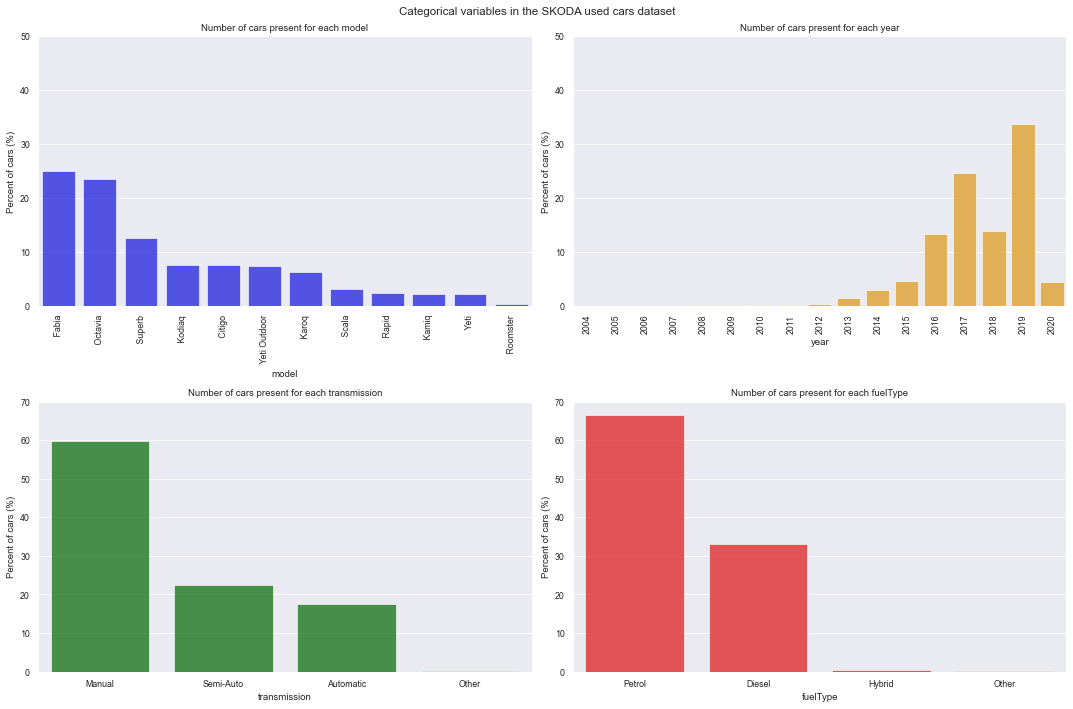

In [10]:
    sns.set_context('paper')

    plt.figure(figsize=(15,10))

    #(1,1)
    plt.subplot(2,2,1)
    barplot(model_count, 'model', 'blue', 90, np.arange(0,51,10))

    #(1,2)
    plt.subplot(2,2,2)
    barplot(year_count, 'year', 'orange', 90, np.arange(0,51,10))

    #(2,1)
    plt.subplot(2,2,3)
    barplot(transmission_count, 'transmission', 'green', 0, np.arange(0,71,10))

    #(2,2)
    plt.subplot(2,2,4)
    barplot(fuelType_count, 'fuelType', 'red', 0, np.arange(0,71,10))

    #title for all the plots
    plt.suptitle("Categorical variables in the SKODA used cars dataset")

    # individual plots  are separated
    plt.tight_layout()

    # display all the plots
    plt.show()


#### Scatterplot and Trendline

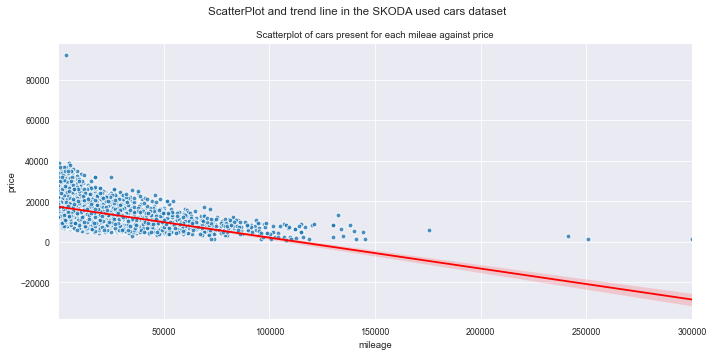

In [11]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 1, 1)
plt.title("Scatterplot of cars present for each mileae against price")

#here the scatterplot is drawn for mileage and price from df dataset 
#the scatter dot has white edge color and the trend line has red color
sns.regplot(x='mileage', y='price', data = df, scatter_kws= { 'edgecolor': 'white'} , line_kws= {'color': 'r'} )

plt.suptitle("ScatterPlot and trend line in the SKODA used cars dataset")

plt.tight_layout()
plt.show()

#### Explanation (scatterplot and trendline)
The above scatterplot shows the relationship between the mileage and price of Skoda used car.

We can easily identify that the scatters are exponentially decreasing. The trendline shows the direction of the scatters. The treadline refers that the values are scattered round the line.



#### Histogram

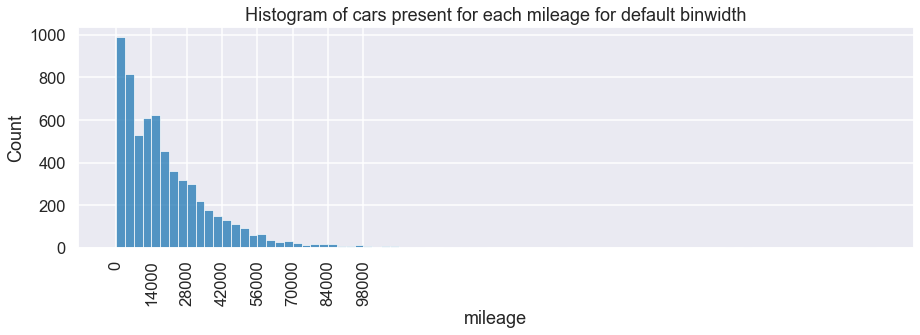

In [12]:
sns.set_context('talk')

plt.figure(figsize=(25, 5))

plt.subplot(1, 2, 1)
plt.title("Histogram of cars present for each mileage for default binwidth")

#binwidth is the duration for each bar in the histogram
sns.histplot(data=df, x='mileage', binwidth = 3500)
#by default binwidth


#sns.distplot(filtered, hist=True,kde=False)
#plt.show()

#x axis value will be shown 7000 value apart from 0 to 3000000
#values are rotated at 45 degree angle
plt.xticks(np.arange(0, 100000, 14000), rotation=90)


plt.tight_layout()
plt.show()






#### Fixing the range using Distplot

C:\Users\sabri\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


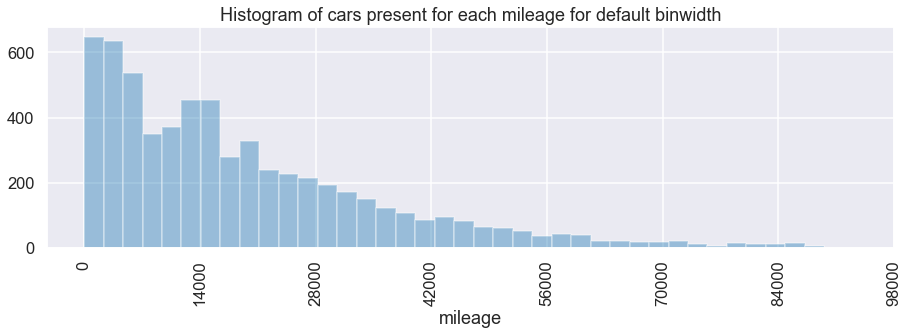

In [13]:
sns.set_context('talk')

plt.figure(figsize=(25, 5))

plt.subplot(1, 2, 1)
plt.title("Histogram of cars present for each mileage for default binwidth")

#limiting the range of histogram of the graph
filtered = df['mileage'][(df['mileage'] >= 0) & (df['mileage'] < 90000)]
sns.distplot(filtered, hist=True,kde=False)
#plt.show()

#x axis value will be shown 7000 value apart from 0 to 3000000
#values are rotated at 45 degree angle
plt.xticks(np.arange(0, 100000, 14000), rotation=90)


plt.tight_layout()
plt.show()






#### Explanation (Histogram)
The above histogram shows us the distribution of mileage of Skoda used car dataset.
The histogram is in positive skew and the squence of the 3 values is mode, median, mean.As it has only one peak, we can call it unimodal.


#### Distribution plot

C:\Users\sabri\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


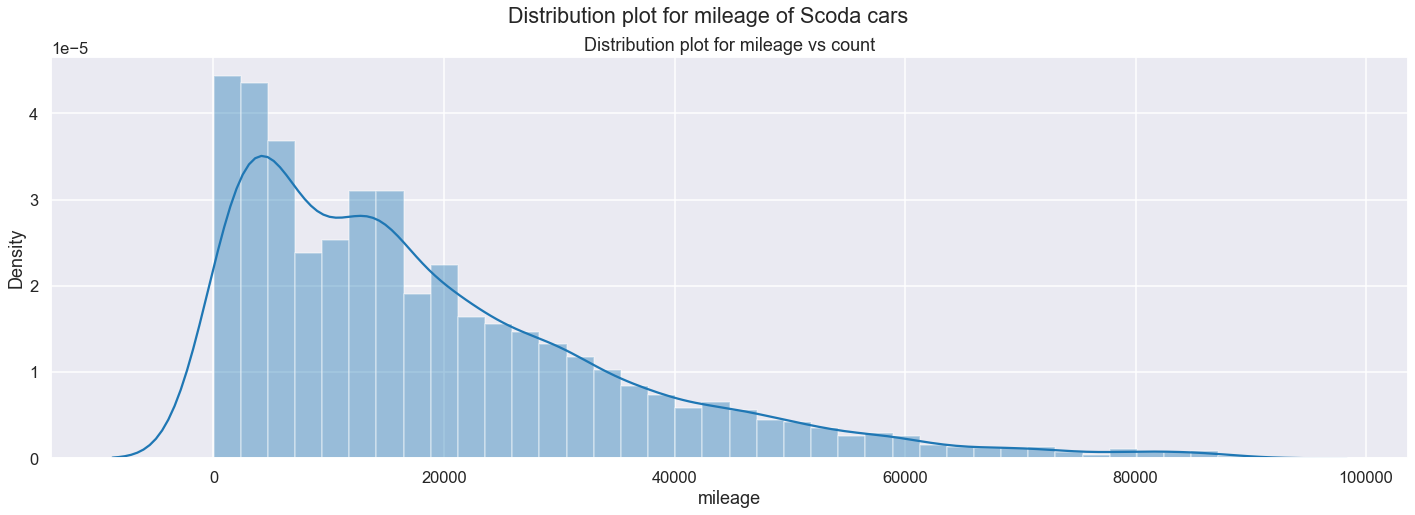

In [14]:
sns.set_context('talk')
plt.figure(figsize=(20, 20))

plt.subplot(3, 1, 1)
plt.title("Distribution plot for mileage vs count")
#sns.histplot(data=df, x='mileage', binwidth = 3500,kde=True, element= 'poly')


filtered = df['mileage'][(df['mileage'] >= 0) & (df['mileage'] < 90000)]
sns.distplot(filtered, hist=True,kde=True)


plt.suptitle("Distribution plot for mileage of Scoda cars")
plt.tight_layout()
plt.show()

#### Explanation (Distribution plot)
The plot is drawn for the occurances for different values of mileage.
The above plot is positively skewed. The distribution plot shows us the approximate flow of the values in the histogram.


#### ECDF Plot

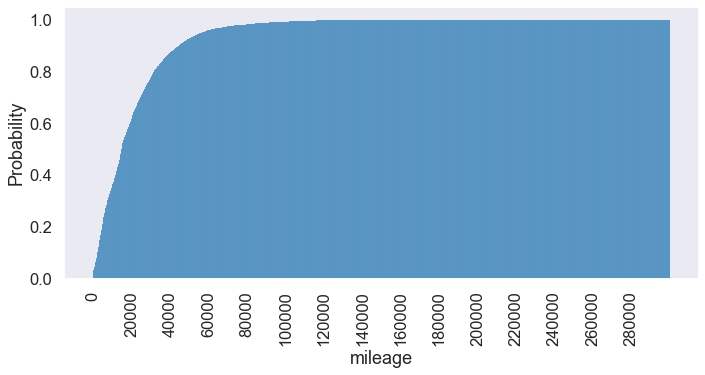

In [15]:
plt.figure(figsize=(25, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='mileage', binwidth = 100, cumulative = True, stat = 'probability')
plt.xticks(np.arange(0, 300000, 20000), rotation=90)
plt.grid()
plt.show()


#### Explanation(ECDF Plot)
Here the plot is drawn for cummutative values of mileage of Skoda used car dataset. It shows us the probability of mileage. Specifically we can see that for 20000 mileage we get the probability approximately 0.6.


In [16]:
display(df.head())
df.info()
print(df['transmission'].unique())

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,Octavia,2017,10550,Manual,25250,Petrol,54.3,1.4
1,Citigo,2018,8200,Manual,1264,Petrol,67.3,1.0
2,Octavia,2019,15650,Automatic,6825,Diesel,67.3,2.0
3,Yeti Outdoor,2015,14000,Automatic,28431,Diesel,51.4,2.0
4,Superb,2019,18350,Manual,10912,Petrol,40.9,1.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6267 entries, 0 to 6266
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6267 non-null   object 
 1   year          6267 non-null   int64  
 2   price         6267 non-null   int64  
 3   transmission  6267 non-null   object 
 4   mileage       6267 non-null   int64  
 5   fuelType      6267 non-null   object 
 6   mpg           6267 non-null   float64
 7   engineSize    6267 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 391.8+ KB
['Manual' 'Automatic' 'Semi-Auto' 'Other']


#### Creating a boxplot & a violineplot

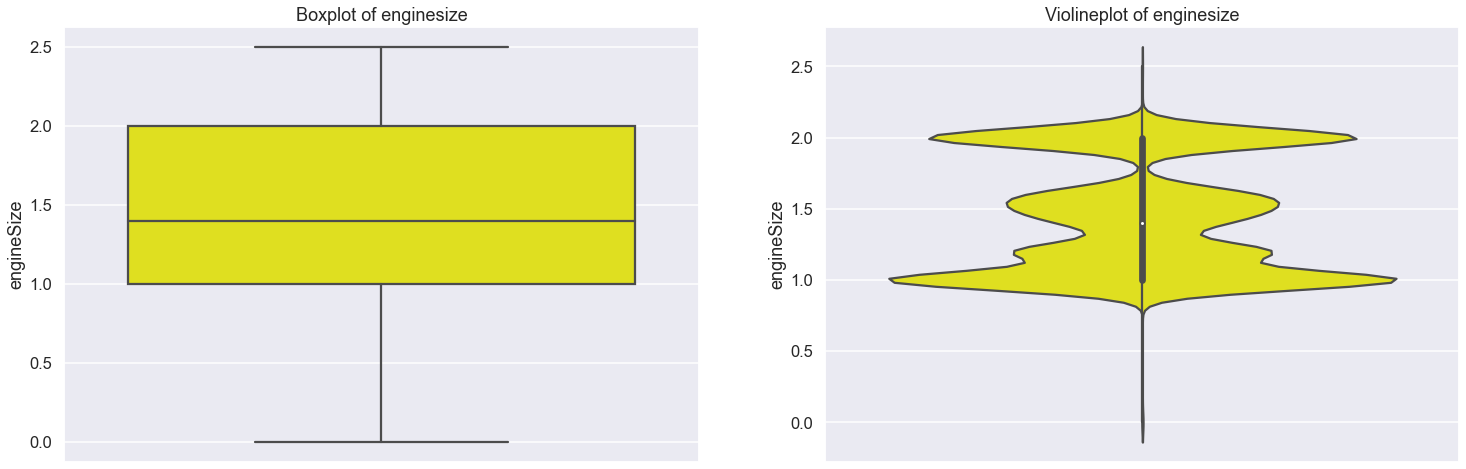

In [27]:
plt.figure(figsize=(25, 8))
plt.subplot(1, 2, 1)
plt.title("Boxplot of enginesize")
sns.boxplot(y="engineSize" , data = df, showfliers = False, color='yellow')
#plt.show()

plt.subplot(1, 2, 2)
plt.title("Violineplot of enginesize")
sns.violinplot(y="engineSize" , data = df, showfliers = False, color='yellow')
plt.show()

#### Explanation (Box plot & Violinplot)
##### Boxplot
The plot shows us the possibillity of the occurance of the values for enginesize of Skoda used car dataset.
Here first quartile is in 1.0, third quartile is in 2.0 and the median is in aproximately 1.4. 25% of data is in first quartile, 50% is in median and 75% is in third quartile. 
The values are in assending order.
Inter quartile range is 1.0.
The highest value is 2.5 and lowest value is 0.0.

##### Violinplot
Here the narrow box in the middle of violineplot shows us the inter quartile range, the white dot represents median value. 
The occurances of different values of enginesize is easily visible here. The occurances of 1.0 is the higer than anyother values.


#### Separating the numerical columns


In [18]:
def separate_num_cols(dataframe):

    # create an empty list to keep the numeric columns
    num_cols = []

    # create a for loop to check the data types of all columns
    for col in dataframe.columns:
        if (dataframe[col].dtypes == 'int64') | (dataframe[col].dtypes == 'float64'):
            num_cols.append(col)
        
    return num_cols

In [19]:
numeric_cols = separate_num_cols(df)

print(numeric_cols)

['year', 'price', 'mileage', 'mpg', 'engineSize']


#### Creating a for loop to show the boxplots of all numeric features

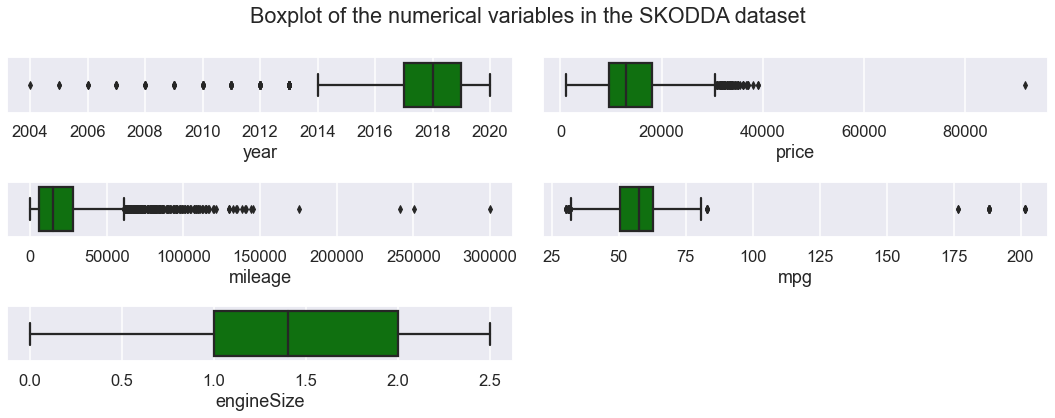

In [29]:
plt.figure(figsize=(15,6))
for index in range(len(numeric_cols)):
    plt.subplot(3,2,index+1)
    sns.boxplot(x=df[numeric_cols[index]],  color='green')

plt.suptitle("Boxplot of the numerical variables in the SKODDA dataset")
plt.tight_layout()
plt.show()


#### Comparing boxplots and violinplot

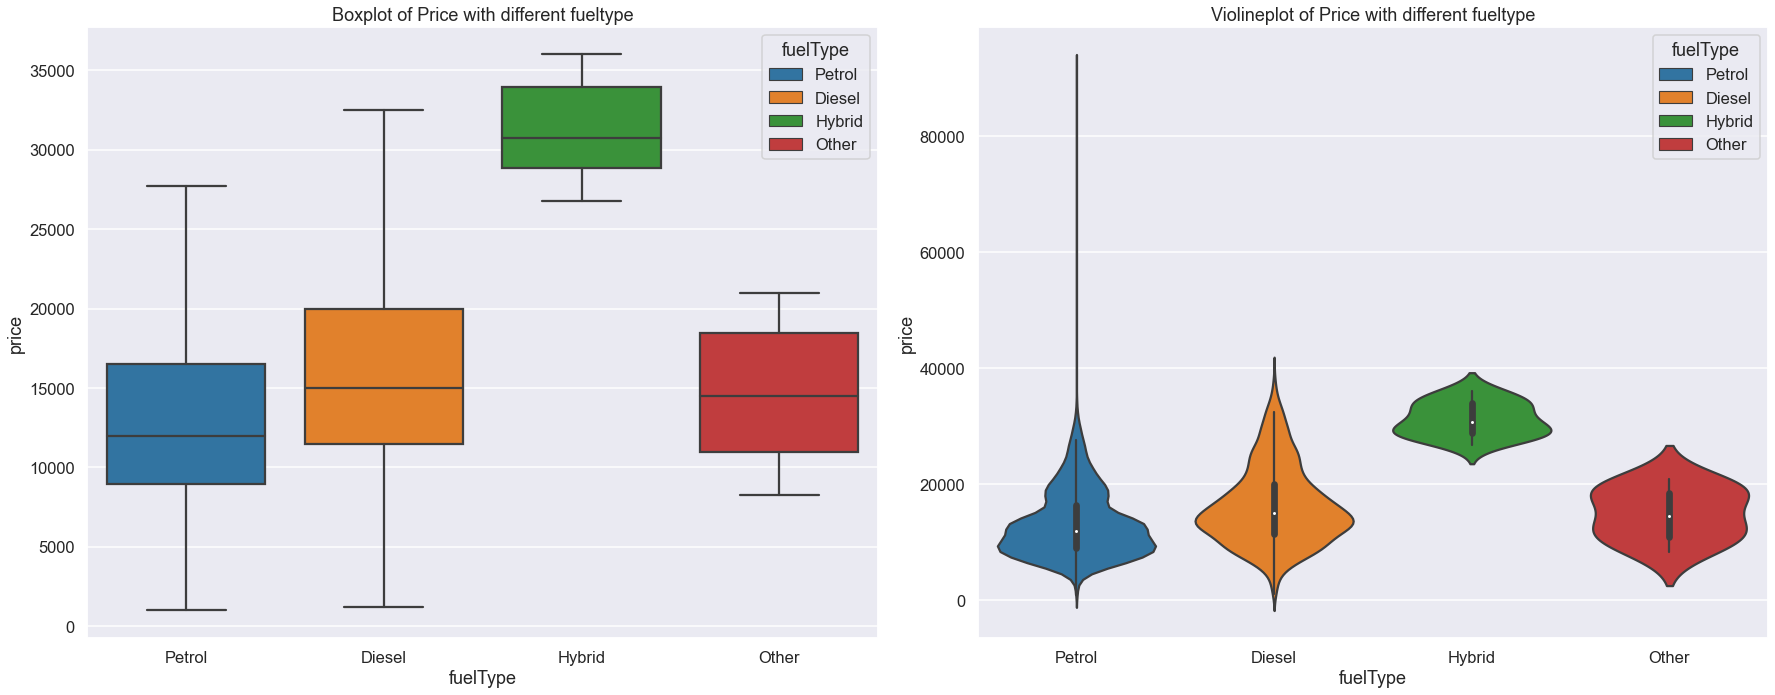

In [21]:
plt.figure(figsize=(25,10))

plt.subplot(1, 2, 1)
plt.title("Boxplot of Price with different fueltype")
sns.boxplot(x='fuelType',  y="price" , hue=df['fuelType'],data= df, dodge= False,showfliers = False)

plt.subplot(1, 2, 2)
plt.title("Violineplot of Price with different fueltype")
sns.violinplot(x='fuelType',  y="price" , hue=df['fuelType'],data= df, dodge= False,showfliers = False)

plt.tight_layout()
plt.show()

#### Explanation 
Here boxplot and violine plot has been created for price with different type of fuel.
We can compare the prices against different type of fuel of Skoda used car dataset.

#### Data preprocessing before visualization

In [22]:
def PreProcessing (data, typee):
    # Data Aggregation
    df_agg = data.groupby(typee)['price'].agg(['count', 'mean', 'sum'])
    
    # sort the dataframe based on the column 'count'
    df_agg = df_agg.sort_values(by='count', ascending=False)

    # create a new column percentage of the cars in each model
    df_agg['percent_of_cars'] = (df_agg['count']/df_agg['count'].sum())*100

    # convert the 'sum' column in millions
    df_agg['sum'] = df_agg['sum']/1000000

    # keep up to two decimal points
    df_agg = df_agg.round(2)

    # remove the 'count' column
    df_agg = df_agg.drop('count', axis=1)

    #display(df_agg.head())
    
    return df_agg

In [23]:
def barplot(data,typee):
    
    plt.figure(figsize=(20,8))

    plt.subplot(1, 3, 1)
    sns.barplot(x='percent_of_cars', y=data.index, data=data, orient='h', color='blue')
    plt.title("Percentage of cars in each " + typee)
    plt.xlabel("Percentage of cars (%)")
    # plt.grid()

    plt.subplot(1, 3, 2)
    sns.barplot(x='mean', y=data.index, data=data, orient='h', color='orange')
    plt.title("Average resale value of the cars of each " + typee)
    plt.xlabel("Average price ($)")
    plt.ylabel("")

    plt.subplot(1, 3, 3)
    sns.barplot(x='sum', y=data.index, data=data, orient='h', color='green')
    plt.title("total resale value of the cars by each " + typee)
    plt.xlabel("Total price in million $")
    plt.ylabel("")

    plt.suptitle("Barplot for the SKODA used car")
    plt.tight_layout()
    plt.show()

#### Barplot: Percentage of cars, Average and Total selling price of cars by model, transmission and fuelType

#### Plotting based on model  

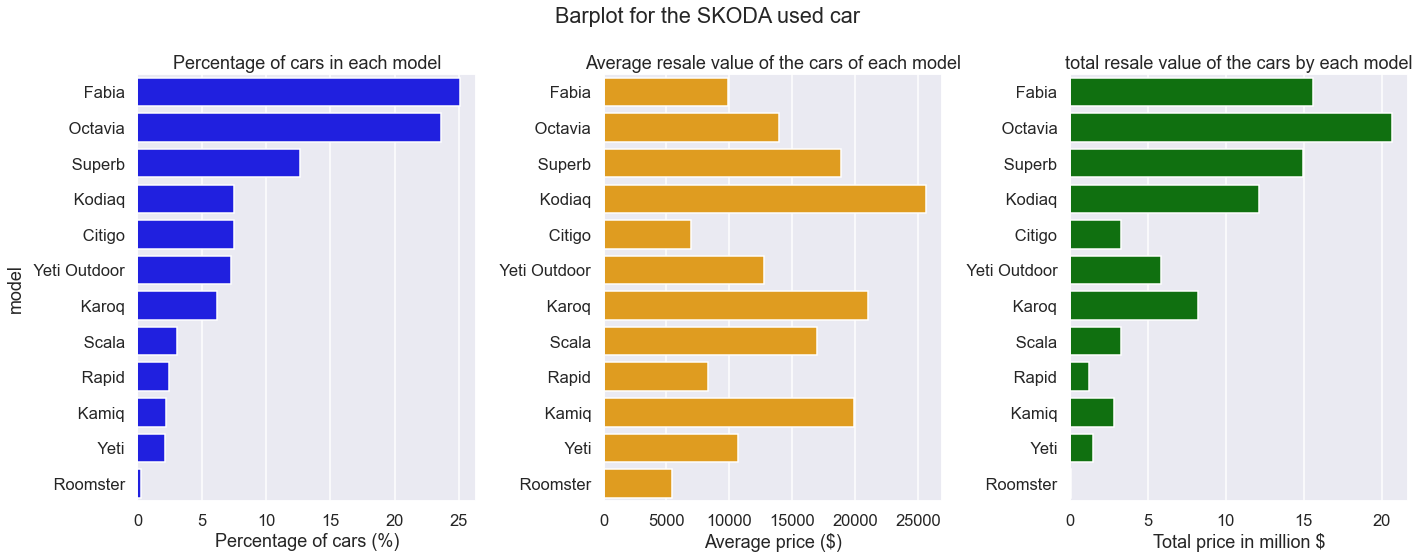

In [24]:
df_agg_model = PreProcessing (df, 'model')

barplot(df_agg_model,'model')

####  Plotting based on Transmission

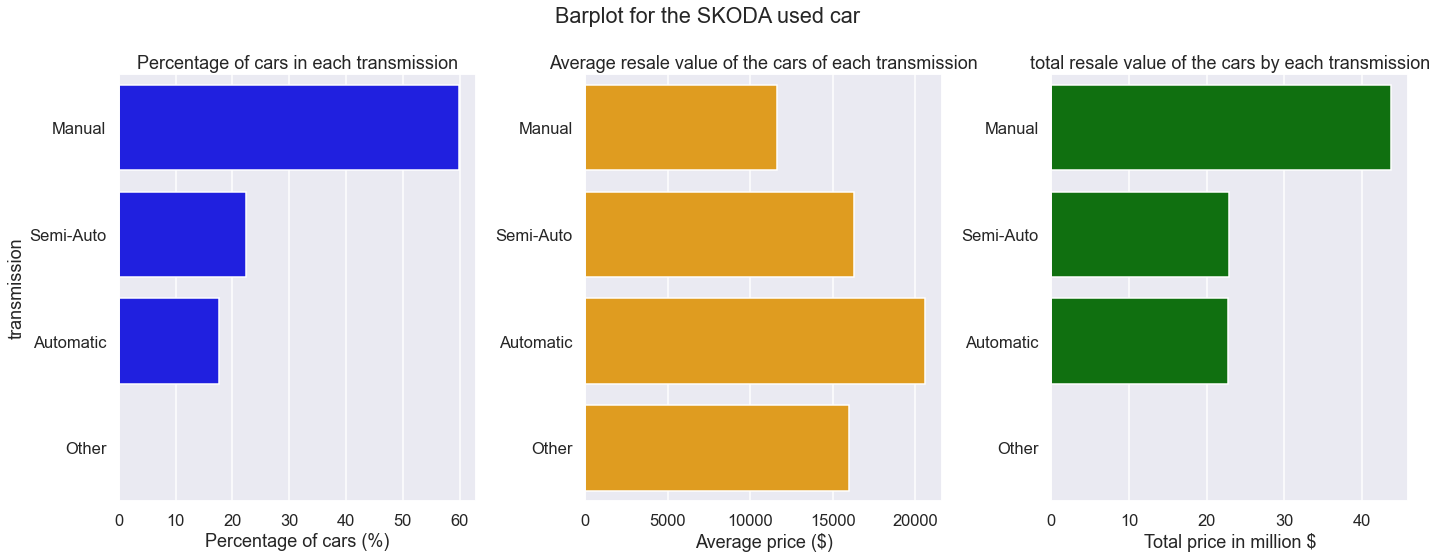

In [25]:
df_agg_transmission = PreProcessing (df, 'transmission')

barplot(df_agg_transmission,'transmission')

#### Plotting based on FuelType

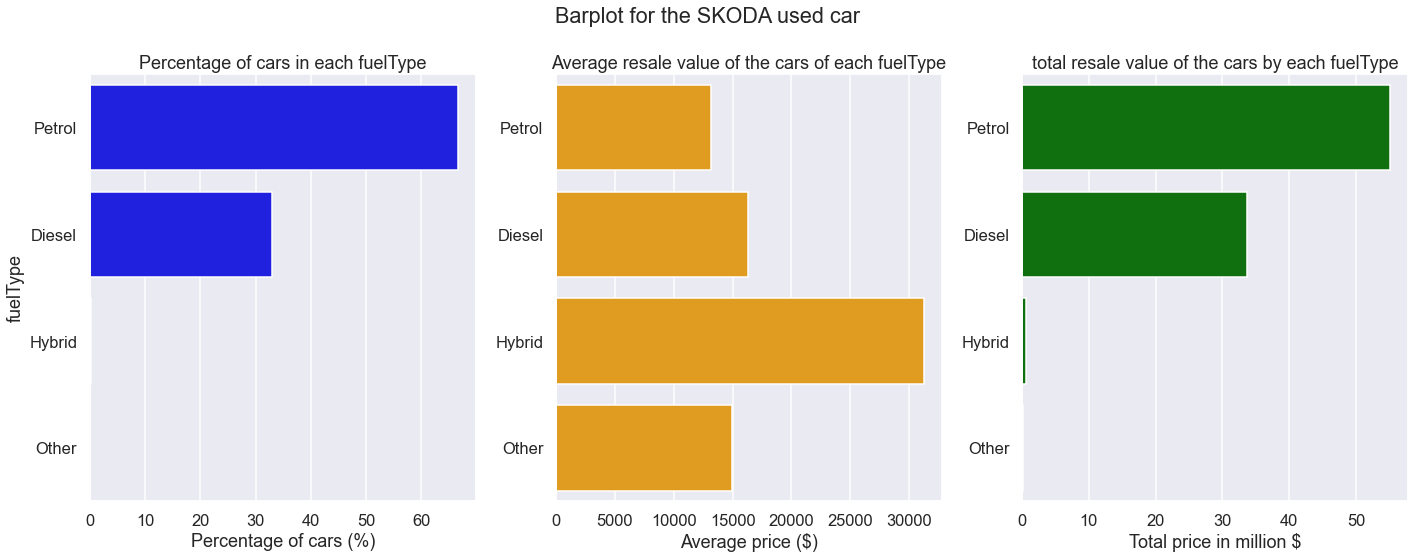

In [26]:
df_agg_FuelType = PreProcessing (df, 'fuelType')

barplot(df_agg_FuelType,'fuelType')